In [283]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [284]:

spring = range(3, 6)
summer = range(6, 9)
fall = range(9, 13)

def season(x):
    if x in spring:
       return 0
    if x in summer:
       return 1
    if x in fall:
       return 2
    else :
       return 3

def season(x):
    if x in spring:
       return 0
    if x in summer:
       return 1
    if x in fall:
       return 2
    else :
       return 3

numbers = [1,2,3,4,5,6,7]
wheel = numbers * 400
def count(start_day,nb_days):
    nb=0
    day = wheel[start_day-1]
    for i in range(nb_days):
        if (day==6 or day==7 or day==5):
            nb+=1
        day = wheel[i]
    return nb

def clean_data(csv_file,n_lines):
    df = pd.read_csv(csv_file)
    df.drop('device',axis=1,inplace=True)
    df.drop(df.index[6293:6294],inplace=True)
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df['start_date']=pd.to_datetime(df['start_date'])
    df['end_date']=pd.to_datetime(df['end_date'])
    df['year_s'] = df['start_date'].dt.year
    df['month_s'] = df['start_date'].dt.month
    df['year_e'] = df['end_date'].dt.year
    df['month_e'] = df['end_date'].dt.month
    #df["format"]=df["format"]
    df["format"] = df["format"].map({"butterfly":0,"tg":1,"showcase":2,"banner":3,"stoprayon":4,"shop":5,"pmp":6,"lucky cart":7,"highco":8})
    df = pd.get_dummies(df, columns=["format"], prefix='', prefix_sep='')
    
    
    
    #df["chain_id"] = df["chain_id"].map({12:12,11:11,10:10,7:17})
    #df = pd.get_dummies(df, columns=["chain_id"], prefix='', prefix_sep='')
    df['passed_months'] = (date.today().year - df['end_date'].dt.year) * 12 + date.today().month - df['end_date'].dt.month
    
    #df['SEASON'] = df['start_date'].dt.month.map(lambda x : season(x))
    


    #df["SEASON"] = df["SEASON"].map({0:20,1:21,2:23,3:24})
    #df = pd.get_dummies(df, columns=["SEASON"], prefix='', prefix_sep='')
    
    df=df.drop('end_date',axis=1)
    df.drop('iremoteid',axis=1,inplace=True)
   
    
   
   
    return df

def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    print('R2 = ',r2_score(y_test, y_pred))
    print('MAE = ',mean_absolute_error(y_test, y_pred))
    print('MSE = ',mean_squared_error(y_test, y_pred))
    print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Meadian = ', median_absolute_error(y_test, y_pred))

In [318]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

#features=[  'height', 'width', 'days']



df = clean_data('train.csv',6292)

itemcats2 = df.groupby(pd.to_datetime(df['start_date']).dt.year,as_index=True ).median()
new_df = pd.concat([df,itemcats2],ignore_index=True, sort=False)

new_df.drop("start_date",axis=1,inplace=True)


y=new_df['budget']
#x=df[features]
x=new_df.drop(["budget","campaign_id","chain_id", 'year_s','passed_months','year_e','month_e'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 


In [286]:
x.columns

Index(['height', 'width', 'days', 'start_day', 'end_day', 'shop', 'month_s',
       '0', '1', '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

In [287]:
x.columns

Index(['height', 'width', 'days', 'start_day', 'end_day', 'shop', 'month_s',
       '0', '1', '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

In [288]:
x.head()

,height,width,days,start_day,end_day,shop,month_s,0,1,2,3,4,5,6,7,8
0,200.0,995.0,5.0,7.0,3.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,486.0,278.0,6.0,2.0,6.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,488.0,265.0,28.0,4.0,2.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,150.0,1200.0,8.0,3.0,2.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,200.0,995.0,44.0,4.0,4.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [289]:
x=x+x.tail(1000)

In [290]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=1)
#Fitting the data to the regressor
rf.fit(x_train, y_train)
#Predicting the Test set results

y_pred=rf.predict(x_test)
#Evaluating
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE =  1372.9811154685995


In [316]:
xg_model=XGBRegressor(
                             learning_rate=0.09, max_depth=4, 
                             
                        
                             random_state =0)
xg_model.fit(x_train, y_train)
evaluate_model(xg_model,x_test,y_test)

R2 =  0.9972158138259748
MAE =  809.7986811813968
MSE =  1872588.160917578
RMSE =  1368.4254312594378
Meadian =  497.4322509765625


In [306]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
stack = StackingCVRegressor(regressors=(xg_model, Lasso(normalize=True),
                    make_pipeline(PolynomialFeatures(3), Ridge()), KNeighborsRegressor(n_neighbors=3, weights='distance',p=1)),
                            meta_regressor=Lasso(), cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=1)

In [307]:
stack.fit(x_train, y_train)
evaluate_model(stack,x_test,y_test)

R2 =  0.9970276462040631
MAE =  833.2032534122434
MSE =  1999145.955201283
RMSE =  1413.9115796970061
Meadian =  483.45177321059236


In [308]:
df = pd.read_csv('train.csv')

y_lg = df[df.format=='showcase'][['budget']]
x_lg=df[df.format=='showcase'][['days']]

x_train2,x_test2,y_train2,y_test2=train_test_split(x_lg,y_lg,test_size=0.2,random_state=0) 
print(x_test2.shape)
print(y_test2.shape)

from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(x_train2,y_train2)
y_pred2 = linreg1.predict(x_test2)
evaluate_model(linreg1,x_test2,y_test2)

(188, 1)
(188, 1)
R2 =  0.9992302973483689
MAE =  452.7842426091441
MSE =  1578425.2458907245
RMSE =  1256.3539492876696
Meadian =  229.72180652143288


In [309]:
submission = clean_data('predictions.csv',1578)



x = submission[['height', 'width', 'days', 'start_day', 'end_day', 'shop', 'month_s',
       '0', '1', '2', '3', '4', '5', '6', '7', '8']]
predicted = stack.predict(x)


submission['budget'] = predicted.reshape((predicted.shape[0]))
submission.to_csv('o7LL.csv', index=False)

In [296]:
submission.describe()

,campaign_id,chain_id,height,width,days,start_day,end_day,shop,year_s,month_s,...,1,2,3,4,5,6,7,8,passed_months,budget
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,...,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,17317.837239,10.898037,364.511083,648.934136,25.892970,3.122229,4.229259,0.006966,2020.318556,6.594680,...,0.172894,0.139329,0.093097,0.033566,0.006966,0.005066,0.001267,0.000633,15.863838,16910.497808
std,11195.793042,1.467991,112.578210,291.776397,30.641586,1.917072,2.222852,0.083200,0.736848,3.048675,...,0.378276,0.346399,0.290660,0.180165,0.083200,0.071021,0.035578,0.025166,8.169378,29838.819263
min,3.000000,7.000000,26.000000,242.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-6799.602624
25%,7678.500000,11.000000,298.000000,398.000000,8.000000,1.000000,2.000000,0.000000,2020.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5763.906196
50%,16922.000000,11.000000,351.000000,574.000000,17.000000,3.000000,4.000000,0.000000,2020.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,9045.957276
75%,27344.500000,12.000000,472.000000,995.000000,31.000000,4.000000,6.000000,0.000000,2021.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,12274.827416
max,37086.000000,12.000000,1440.000000,2560.000000,296.000000,7.000000,7.000000,1.000000,2021.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,334489.311716


In [297]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 0 to 1578
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    1579 non-null   int64         
 1   chain_id       1579 non-null   int64         
 2   start_date     1579 non-null   datetime64[ns]
 3   height         1579 non-null   float64       
 4   width          1579 non-null   float64       
 5   days           1579 non-null   float64       
 6   start_day      1579 non-null   float64       
 7   end_day        1579 non-null   float64       
 8   shop           1579 non-null   float64       
 9   year_s         1579 non-null   int64         
 10  month_s        1579 non-null   int64         
 11  year_e         1579 non-null   int64         
 12  month_e        1579 non-null   int64         
 13  0              1579 non-null   uint8         
 14  1              1579 non-null   uint8         
 15  2              1579 n

In [310]:
nb=0
for i in range(len(submission)):
    

    if submission.at[i,'2']==1:
        nb+=1
        print(submission.at[i,'budget'])
        submission.at[i,'budget']=submission.at[i,'days']*2285.7142857222225
        print(submission.at[i,'budget'])

print(nb)

10733.662359442773
18285.71428577778
9785.707761906391
16000.000000055557
25816.575943723874
34285.71428583334
10006.218029274023
16000.000000055557
6045.297625035815
11428.571428611112
20240.303406396877
20571.4285715
52353.19053354442
52571.42857161112
80884.90845711503
80000.00000027778
23174.266813702117
22857.142857222225
240358.85611049068
237714.28571511112
123901.90001643222
123428.57142900002
164456.85634195962
162285.7142862778
127499.3367514658
125714.28571472224
4586.627953037878
4571.428571444445
289950.31454502244
294857.1428581667
57279.89854317704
57142.85714305556
43221.52090647547
43428.57142872223
87969.589581215
86857.14285744446
15287.666452320082
16000.000000055557
48061.13793332503
48000.00000016667
71146.92394577229
70857.1428573889
23049.374484942062
22857.142857222225
43537.74056710711
43428.57142872223
87617.24499479213
86857.14285744446
121795.53467020337
121142.8571432778
119348.08577575829
118857.14285755556
101607.3835440065
100571.4285717778
78284.414659

In [299]:
submission.describe()

,campaign_id,chain_id,height,width,days,start_day,end_day,shop,year_s,month_s,...,1,2,3,4,5,6,7,8,passed_months,budget
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,...,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,17317.837239,10.898037,364.511083,648.934136,25.892970,3.122229,4.229259,0.006966,2020.318556,6.594680,...,0.172894,0.139329,0.093097,0.033566,0.006966,0.005066,0.001267,0.000633,15.863838,16902.544193
std,11195.793042,1.467991,112.578210,291.776397,30.641586,1.917072,2.222852,0.083200,0.736848,3.048675,...,0.378276,0.346399,0.290660,0.180165,0.083200,0.071021,0.035578,0.025166,8.169378,29654.315768
min,3.000000,7.000000,26.000000,242.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-6799.602624
25%,7678.500000,11.000000,298.000000,398.000000,8.000000,1.000000,2.000000,0.000000,2020.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5763.906196
50%,16922.000000,11.000000,351.000000,574.000000,17.000000,3.000000,4.000000,0.000000,2020.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,9052.354634
75%,27344.500000,12.000000,472.000000,995.000000,31.000000,4.000000,6.000000,0.000000,2021.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,12324.105031
max,37086.000000,12.000000,1440.000000,2560.000000,296.000000,7.000000,7.000000,1.000000,2021.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,342857.142858


In [311]:

submission=submission[['campaign_id','budget']]

submission.to_csv('LL.csv', index=False)

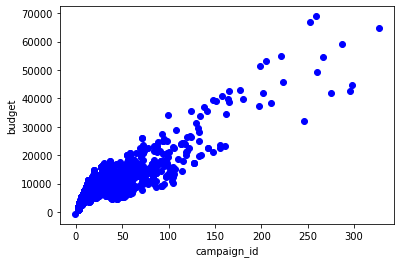

In [301]:
df_plot = df[df['format']=='butterfly']

plt.scatter(df_plot.days, df_plot.budget,  color='blue')
plt.xlabel("campaign_id")
plt.ylabel("budget")
plt.show()

#df["format"] = df["format"].map({"butterfly":0,"tg":1,"showcase":2,"banner":3,"stoprayon":4,"shop":5,"pmp":6,"lucky cart":7,"highco":8})

In [302]:
(109714.285714-68571.428571)/(48-30)

2285.7142857222225